In [202]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import chi2_contingency

## Mushroom Dataset

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Load data

In [219]:
DATA_URL = "https://raw.githubusercontent.com/chainer/chainer/master/examples/glance/mushrooms.csv"


In [220]:
df = pd.read_csv(DATA_URL)

# Data exploration

In [139]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [140]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [141]:
df.shape

(8124, 23)

# Data Preprocessing-Label Encoding

In [221]:
l_encoder = LabelEncoder()

In [222]:
df["class"] = l_encoder.fit_transform(df["class"])

In [144]:
x = df.drop("class", axis=1)
y = df["class"]

In [145]:
x.shape

(8124, 22)

In [146]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [147]:
categorical_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [148]:
x_encoded = pd.get_dummies(x, columns=categorical_columns, drop_first=True)

In [149]:
x_encoded.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [150]:
x = x_encoded

In [151]:
x.shape

(8124, 95)

# Split data into x and y

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Make Models

In [153]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

### Random Forest

In [154]:
rf = RandomForestClassifier()

In [155]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [2, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20],
}

In [156]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kfold,
    n_jobs=-1,
)

In [157]:
start_time = time.time()
grid.fit(x_train, y_train)
end_time = time.time()

In [158]:
f"Training time: {end_time - start_time} seconds"

'Training time: 79.38349890708923 seconds'

In [159]:
grid.best_score_

np.float64(1.0)

In [160]:
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

### Logistic Regression

In [161]:
lrmodel = LogisticRegression()

In [162]:
param_grid_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    "class_weight": [None, "balanced"],
}

In [163]:
grid_lr = GridSearchCV(
    estimator=lrmodel,
    param_grid=param_grid_lr,
    cv=kfold,
    n_jobs=-1,
)

In [164]:
start_time = time.time()
grid_lr.fit(x_train, y_train)
end_time = time.time()

In [165]:
f"Training time: {end_time - start_time} seconds"

'Training time: 2.2520079612731934 seconds'

In [166]:
grid_lr.best_score_

np.float64(1.0)

In [167]:
grid_lr.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

### Support Vector Classifier

In [168]:
svmmodel = SVC()

In [169]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'class_weight': [None, 'balanced']
}

In [170]:
grid_svc = GridSearchCV(
    estimator=svmmodel,
    param_grid=param_grid_svc,
    cv=kfold,
    n_jobs=-1,
)

In [171]:
start_time = time.time()
grid_svc.fit(x_train, y_train)
end_time = time.time()

In [172]:
f"Training time: {end_time - start_time} seconds"

'Training time: 133.6265368461609 seconds'

In [173]:
grid_svc.best_score_

np.float64(1.0)

In [174]:
grid_svc.best_params_

{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

# Models evaluation

In [175]:
y_predict_rf = grid.predict(x_test)

In [176]:
accuracy_score(y_test, y_predict_rf)

1.0

In [177]:
y_predict_lr = grid_lr.predict(x_test)

In [178]:
accuracy_score(y_test, y_predict_lr)

1.0

In [179]:
svm_y_predict = grid_svc.predict(x_test)

In [180]:
accuracy_score(y_test, svm_y_predict)

1.0

# Confusion matrices

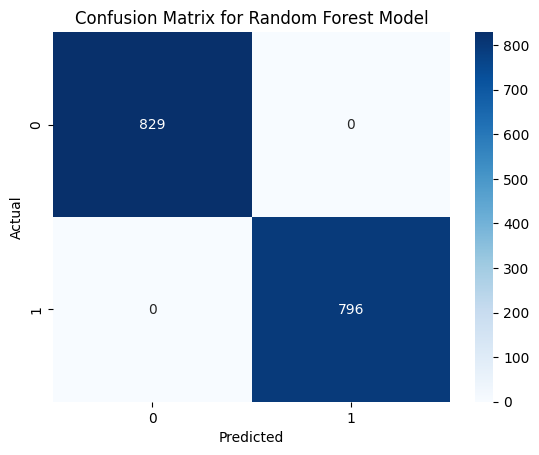

In [181]:
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

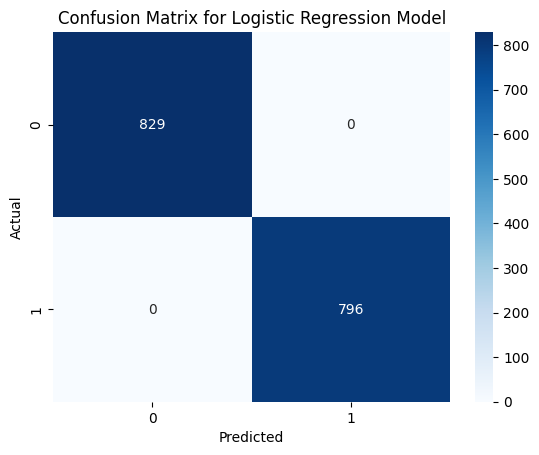

In [182]:
cm = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

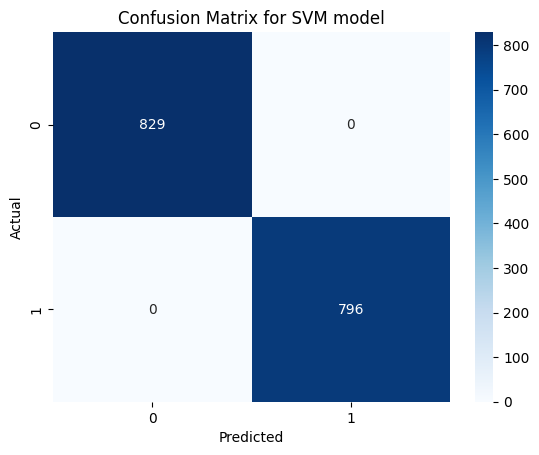

In [183]:
cm = confusion_matrix(y_test, svm_y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM model")
plt.show()

## Investigate feature importances

In [184]:
best_rf = grid.best_estimator_

In [185]:
importances = best_rf.feature_importances_

importances = zip(importances, x_train.columns)

In [186]:
dict_importnaces = {}

for importance, column in importances:
    feature = column.split('_')[0]
    if feature in dict_importnaces:
        dict_importnaces[feature] += importance
    else:
        dict_importnaces[feature] = importance
    

In [187]:
dict_importnaces = dict(sorted(dict_importnaces.items(), key=lambda item: item[1], reverse=True))


In [188]:
dict_importnaces

{'odor': np.float64(0.25813507044561623),
 'gill-size': np.float64(0.10701860323360185),
 'spore-print-color': np.float64(0.1033859182616649),
 'stalk-surface-above-ring': np.float64(0.09588977145443761),
 'stalk-surface-below-ring': np.float64(0.06098284749645542),
 'ring-type': np.float64(0.058087840209123956),
 'stalk-root': np.float64(0.055648559651204126),
 'population': np.float64(0.047399500468924646),
 'bruises': np.float64(0.03614580051404334),
 'habitat': np.float64(0.03519568109005911),
 'gill-spacing': np.float64(0.024061036908656307),
 'stalk-color-below-ring': np.float64(0.02247014613035125),
 'ring-number': np.float64(0.022213207900780643),
 'stalk-color-above-ring': np.float64(0.016125177760365973),
 'cap-color': np.float64(0.015783974085270838),
 'gill-color': np.float64(0.014853989254446271),
 'stalk-shape': np.float64(0.0141935964657541),
 'cap-surface': np.float64(0.006793444768359077),
 'cap-shape': np.float64(0.00320449787663439),
 'veil-color': np.float64(0.00141

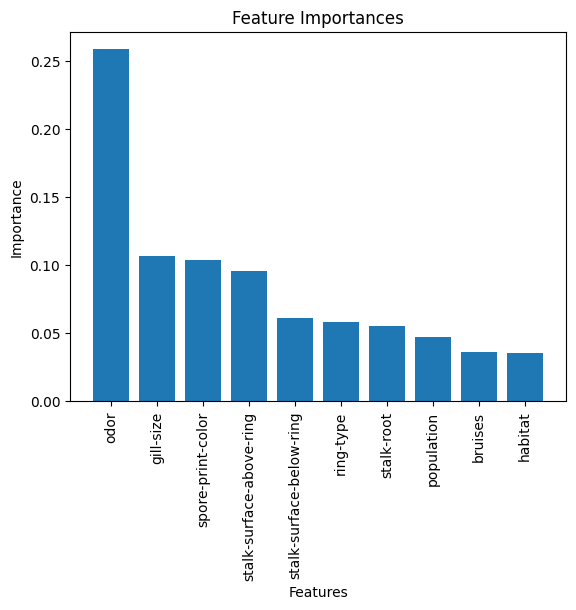

In [189]:
features = list(dict_importnaces.keys())[:10]
values = list(dict_importnaces.values())[:10]

plt.bar(features, values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.savefig("diagrams/feature_importances.png")
plt.show()

## Chi-square test of independence for the most important features

### Feature: odor

In [190]:
contingency_table = pd.crosstab(df["class"], df["odor"])


In [191]:
contingency_table

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
0,400,0,0,400,0,3408,0,0,0
1,0,192,2160,0,36,120,256,576,576


In [192]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [193]:
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected counts:\n", expected)

Chi-square statistic: 7659.726740165339
p-value: 0.0
Degrees of freedom: 8
Expected counts:
 [[ 207.18857706   99.45051699 1118.8183161   207.18857706   18.64697194
  1827.40324963  132.60068932  298.35155096  298.35155096]
 [ 192.81142294   92.54948301 1041.1816839   192.81142294   17.35302806
  1700.59675037  123.39931068  277.64844904  277.64844904]]


A very large chi-square statistic and a small p-value indicate a statistically significant difference between the groups.

In [194]:
classes = {
    0: 'edible',
    1: 'poisonous'
}

odor_map = {
    'a': 'almond',
    'l': 'anise',
    'c': 'creosote',
    'y': 'fishy',
    'f': 'foul',
    'm': 'musty',
    'n': 'none',
    'p': 'pungent',
    's': 'spicy'
}

df['odor'] = df['odor'].map(odor_map)

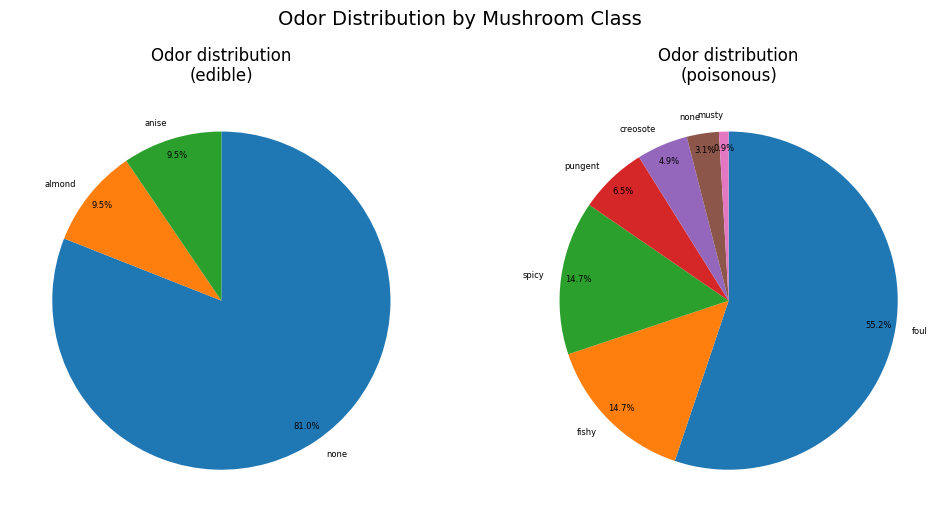

In [195]:
grouped = df.groupby('class')['odor']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (group_idx, group_data) in enumerate(grouped):
    counts = group_data.value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        textprops={'fontsize': 6},
        pctdistance=0.9
    )
    axes[i].set_title(f"Odor distribution\n({classes[group_idx]})")

plt.suptitle("Odor Distribution by Mushroom Class", fontsize=14)
plt.savefig("diagrams/odor_distribution.png")
plt.show()

### Feature: spore-print-color

In [196]:
contingency_table = pd.crosstab(df["class"], df["spore-print-color"])
contingency_table

spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
0,48,48,1648,1744,48,0,48,576,48
1,0,1584,224,224,0,72,0,1812,0


In [197]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected counts:\n", expected)

Chi-square statistic: 4602.0331700846045
p-value: 0.0
Degrees of freedom: 8
Expected counts:
 [[  24.86262925  845.32939439  969.64254062 1019.36779911   24.86262925
    37.29394387   24.86262925 1236.91580502   24.86262925]
 [  23.13737075  786.67060561  902.35745938  948.63220089   23.13737075
    34.70605613   23.13737075 1151.08419498   23.13737075]]


A very small p-value indicates a statistically significant difference between the groups.

In [198]:
classes = {
    0: 'edible',
    1: 'poisonous'
}

spore_print_color_map = {
    'k': 'black', 
    'n': 'brown', 
    'b': 'buff', 
    'h': 'chocolate', 
    'r': 'green', 
    'o': 'orange', 
    'u': 'purple', 
    'w': 'white', 
    'y': 'yellow', 
}

df['spore-print-color'] = df['spore-print-color'].map(spore_print_color_map)

In [199]:
grouped = df.groupby('class')['spore-print-color']

In [203]:
cmap = cm.get_cmap('Set3') 
colors = cmap(np.arange(len(counts)))

/var/folders/db/zk60mt7n64x4pf50fm2v1qvw0000gn/T/ipykernel_21437/1738645160.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3')


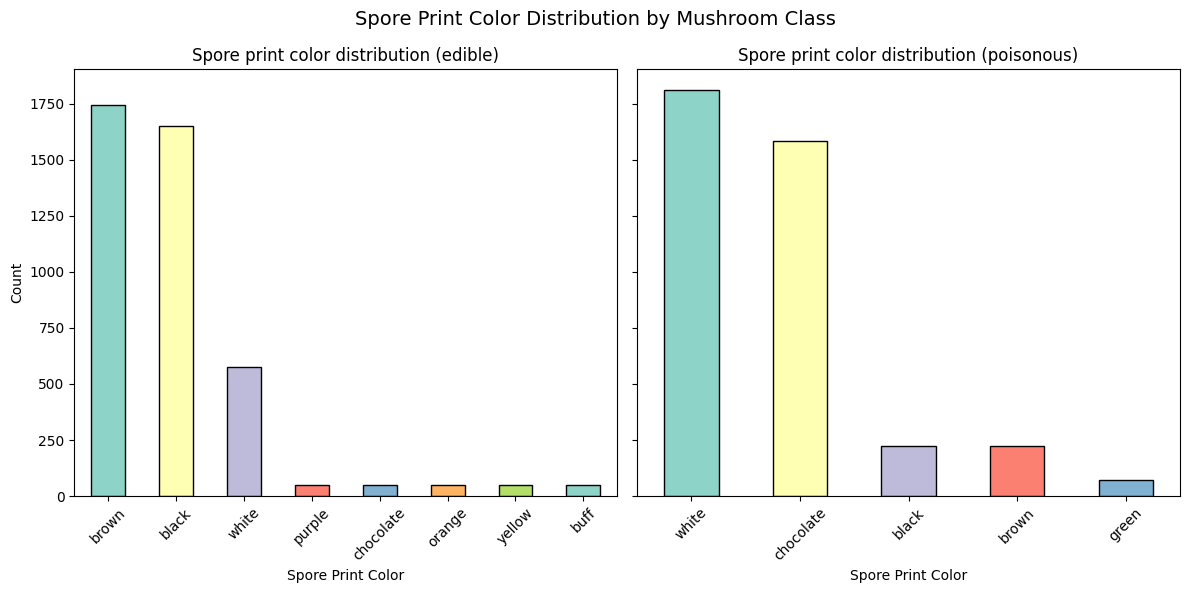

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (group_idx, group_data) in enumerate(grouped):
    counts = group_data.value_counts()
    counts.plot(
        kind='bar',
        ax=axes[i],
        color=colors,
        edgecolor='black'
    )
    axes[i].set_title(f"Spore print color distribution ({classes[group_idx]})")
    axes[i].set_xlabel("Spore Print Color")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Spore Print Color Distribution by Mushroom Class", fontsize=14)
plt.tight_layout()
plt.savefig("diagrams/spore_print_distribution.png")
plt.show()

### Feature: gill-size

In [223]:
contingency_table = pd.crosstab(df["class"], df["gill-color"])
contingency_table

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
0,0,96,248,204,344,936,64,852,0,444,956,64
1,1728,0,504,528,64,112,0,640,24,48,246,22


In [224]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected counts:\n", expected)

Chi-square statistic: 3765.714086241481
p-value: 0.0
Degrees of freedom: 11
Expected counts:
 [[895.05465288  49.72525849 389.51452486 379.15509601 211.3323486
  542.83407189  33.15017233 772.81339242  12.43131462 254.84194978
  622.60167405  44.54554407]
 [832.94534712  46.27474151 362.48547514 352.84490399 196.6676514
  505.16592811  30.84982767 719.18660758  11.56868538 237.15805022
  579.39832595  41.45445593]]


In [225]:
classes = {
    0: 'edible',
    1: 'poisonous'
}

gill_size_map = {
    'b': 'broad',
    'n': 'narrow'
}

df['gill-size'] = df['gill-size'].map(gill_size_map)

In [226]:
grouped = df.groupby('class')['gill-size']

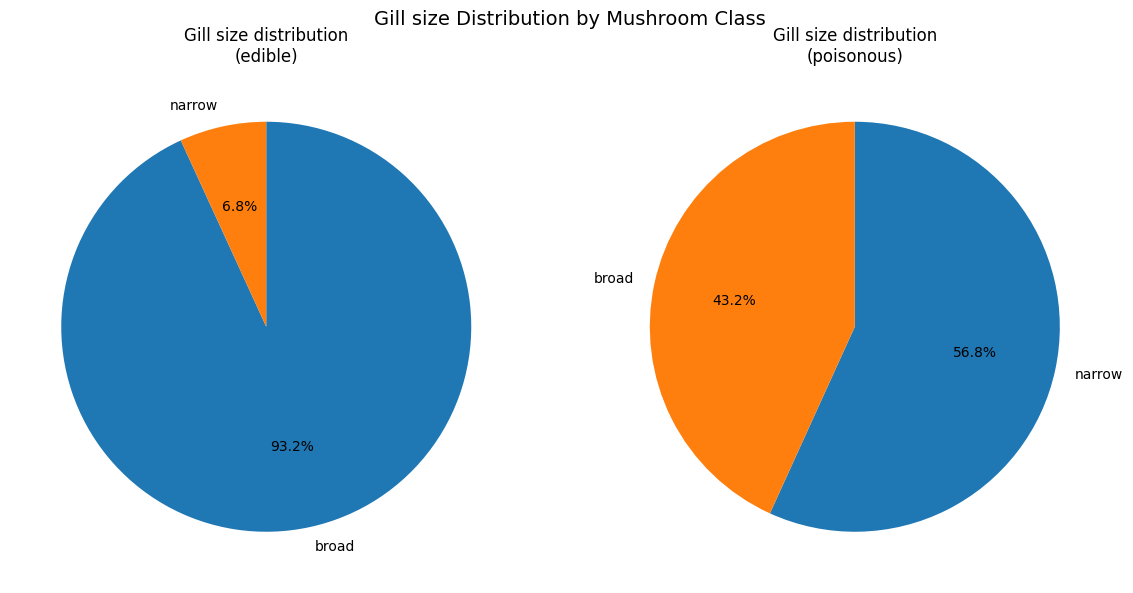

In [228]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (group_idx, group_data) in enumerate(grouped):
    counts = group_data.value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Gill size distribution\n({classes[group_idx]})")

plt.suptitle("Gill size Distribution by Mushroom Class", fontsize=14)
plt.tight_layout()
plt.savefig("diagrams/gill_distribution.png")
plt.show()